In [73]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python 
import pandas as pd
import numpy as np                        # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics

class Univariate():
    def __init__(self,welldata):
        self.filename = welldata # set filename
        self.welldata = pd.read_csv(welldata) # read well data into dataframe
        self.sandstone = self.welldata.loc[(data.welldata['Facies'] == 1)] # Group by facies (Sandstone)
        self.shale = self.welldata.loc[(data.welldata['Facies'] == 0)] # Group by facies (Shale)

        
    def comp_outliers(self,dataframe,metric):
        # computes the upper and lower fence based on Tukey 1.5 x IQR method and returns an array of format 
        # [lower_fence,upper_fence]
        P25 = np.percentile(dataframe[metric].values,25)
        P75 = np.percentile(dataframe[metric].values,75)
        lower_fence = P25 - 1.5*(P75-P25)
        upper_fence = P75 + 1.5*(P75-P25)
        if lower_fence < 0.0:
            lower_fence = 0.0
        return [lower_fence,upper_fence]
    
    def remove_outliers(self,dataframe,metric):
        # removes outliers from dataframe and returns new dataframe without outliers
        bounds = self.comp_outliers(dataframe,metric)
        cleaned_data = dataframe.loc[(dataframe[metric] >= bounds[0]) & (dataframe[metric] <= bounds[1])]
        return cleaned_data 
    

In [74]:
data = Univariate('1_sample_data.csv')

data.welldata.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,271.0,294.247232,172.581236,0.000000,145.500000,291.000000,449.500000,583.000000
X,271.0,479.501845,286.991468,0.000000,240.000000,480.000000,710.000000,990.000000
Y,271.0,526.092251,283.632200,9.000000,299.000000,519.000000,760.000000,1014.000000
Facies,271.0,0.771218,0.420826,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,271.0,0.141707,0.028341,0.060693,0.121702,0.139365,0.157774,0.221607
Perm,271.0,405.800235,2187.349333,0.018054,1.583239,7.817239,52.040563,24182.542972
AI,271.0,5174.470023,1136.028676,1808.774980,4481.353010,5111.164955,5956.595128,8260.108949


In [75]:
Sandstone = data.welldata.loc[(data.welldata['Facies'] == 1)] # Group by facies (Sandstone)
Shale = data.welldata.loc[(data.welldata['Facies'] == 0)] # Group by facies (Shale)

## Sandstone Data

In [76]:
Sandstone.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209.0,290.358852,169.809538,0.000000,156.000000,289.000000,435.000000,583.000000
X,209.0,455.502392,265.764701,0.000000,240.000000,480.000000,650.000000,990.000000
Y,209.0,550.569378,272.275165,39.000000,319.000000,529.000000,760.000000,1014.000000
Facies,209.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Porosity,209.0,0.149083,0.026101,0.095861,0.131588,0.146622,0.164331,0.221607
Perm,209.0,523.181040,2479.890863,0.051426,3.129173,11.476221,84.635084,24182.542972
AI,209.0,4936.877288,1085.995873,1808.774980,4323.356240,4917.787156,5589.604922,8260.108949


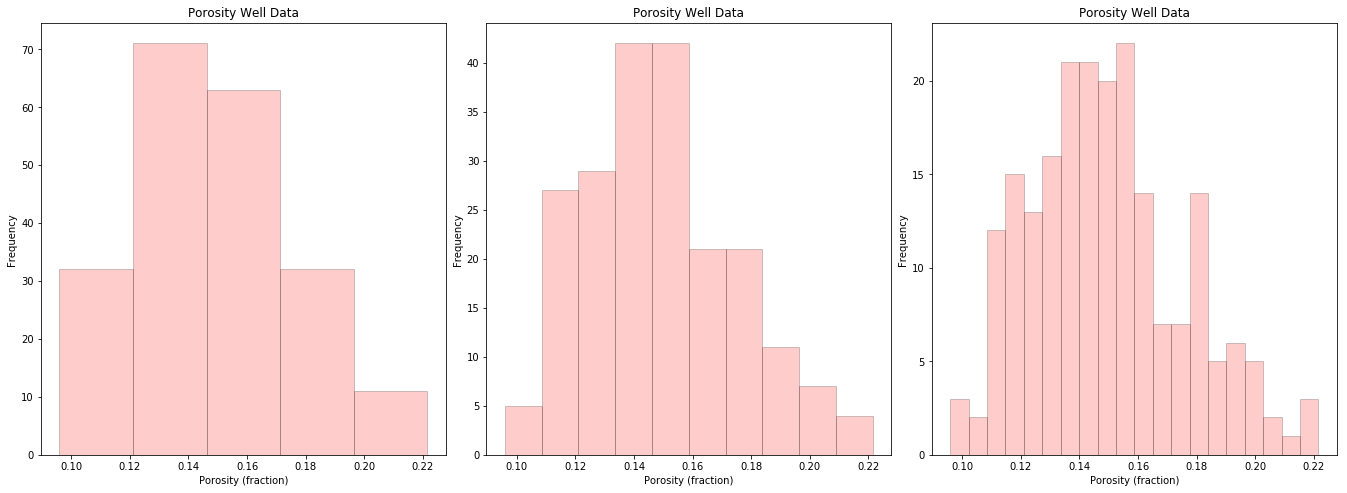

In [78]:
pormin = np.amin(Sandstone['Porosity'].values)
pormax = np.amax(Sandstone['Porosity'].values)
plt.subplot(131)
GSLIB.hist_st(Sandstone['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=5,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(132)
GSLIB.hist_st(Sandstone['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=10,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(133)
GSLIB.hist_st(Sandstone['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=20,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.1, hspace=0.2)
#plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

## Shale Data

In [79]:
Shale.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,62.0,307.354839,182.433738,8.000000,136.250000,313.500000,467.250000,580.000000
X,62.0,560.403226,339.259437,10.000000,200.000000,685.000000,880.000000,990.000000
Y,62.0,443.580645,307.117831,9.000000,200.000000,364.500000,734.000000,1014.000000
Facies,62.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Porosity,62.0,0.116841,0.020427,0.060693,0.101916,0.117847,0.130192,0.160937
Perm,62.0,10.113326,30.496192,0.018054,0.313964,1.408676,5.625017,208.690920
AI,62.0,5975.387470,919.460197,3872.314142,5411.848650,6044.539281,6585.804845,7911.757046


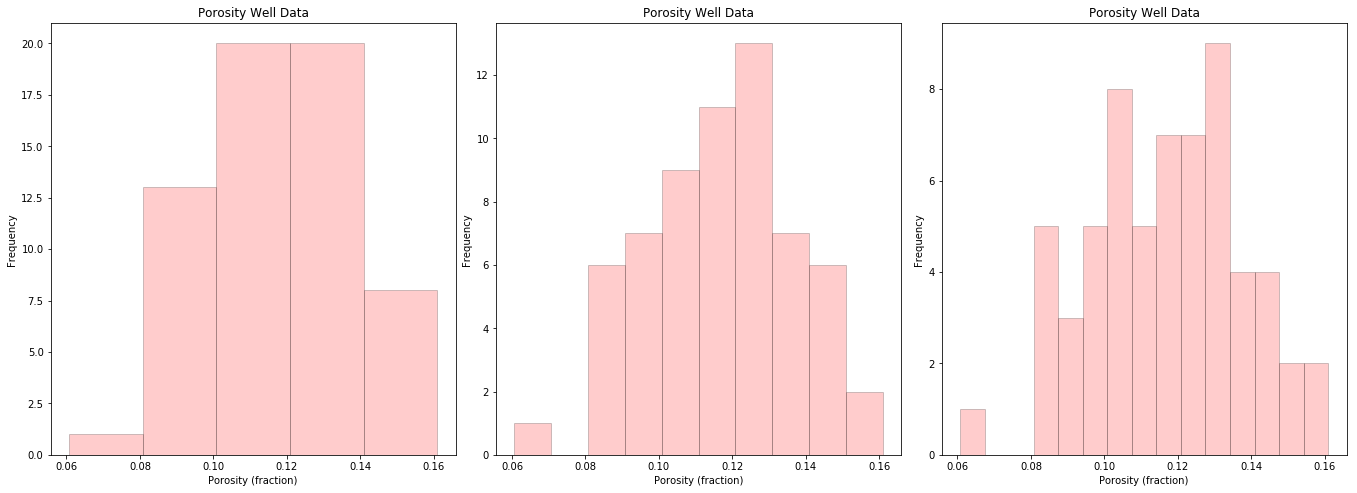

In [80]:
pormin = np.amin(Shale['Porosity'].values)
pormax = np.amax(Shale['Porosity'].values)
plt.subplot(131)
GSLIB.hist_st(Shale['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=5,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(132)
GSLIB.hist_st(Shale['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=10,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplot(133)
GSLIB.hist_st(Shale['Porosity'].values,pormin,pormax,log=False,cumul = False,bins=15,weights = None,xlabel='Porosity (fraction)',title='Porosity Well Data')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.5, wspace=0.1, hspace=0.2)
#plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
plt.show()

# Permeability Plots

/home/preston/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """


Text(0,0.5,'Probability')

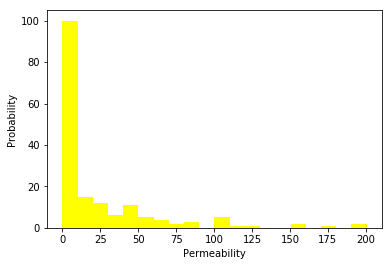

In [83]:
Shale_perm_cleaned = data.remove_outliers(Shale,'Perm')
Sandstone_perm_cleaned = data.remove_outliers(Sandstone,'Perm')

plt.hist(Shale_perm_cleaned['Perm'].values,log=False,cumulative=False,bins=15,weights = None,label='Shale',color='lightgray')

plt.hist(Sandstone_perm_cleaned['Perm'].values,log=False,cumulative=False,bins=20,weights = None,label='Sandstone',color='yellow')
plt.xlabel('Permeability')
plt.ylabel('Probability')